In [176]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\credit_card_fraud')

In [177]:
#Load the libraries from package 'credit_card_fraud/__init__.py file under the location mentioned above'
from credit_card_fraud.__init__ import * 
from credit_card_fraud.config import *

In [195]:
#check the shape of dataframe
train_df = pd.read_csv(train_data_path)
train_df.shape


(30000, 25)

In [179]:
train_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [196]:
#let us rename col names and drop ID
train_df = train_df.rename(columns={'default.payment.next.month':'default'})
train_df = train_df.drop(['ID'], axis =1)

## See the summary of columns

In [181]:
train_df.shape,train_df.dtypes

((30000, 24), LIMIT_BAL    float64
 SEX            int64
 EDUCATION      int64
 MARRIAGE       int64
 AGE            int64
 PAY_0          int64
 PAY_2          int64
 PAY_3          int64
 PAY_4          int64
 PAY_5          int64
 PAY_6          int64
 BILL_AMT1    float64
 BILL_AMT2    float64
 BILL_AMT3    float64
 BILL_AMT4    float64
 BILL_AMT5    float64
 BILL_AMT6    float64
 PAY_AMT1     float64
 PAY_AMT2     float64
 PAY_AMT3     float64
 PAY_AMT4     float64
 PAY_AMT5     float64
 PAY_AMT6     float64
 default        int64
 dtype: object)

Text(0, 0.5, 'count')

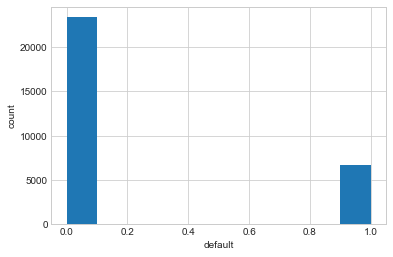

In [184]:
train_df.default.hist()
plt.xlabel('default')
plt.ylabel('count')
# positive cases are less
#0 means negative (defaukt :no)
#1 means positive (default :yes)

In [200]:
fraud,normal = len(train_df[train_df.default == 1]),len(train_df[train_df.default == 0])
print(normal,fraud)

23364 6636


## Insight
Data is unbalanced (approximately 1:1 is balanced data )

In [186]:
#no missing value..That's great news
train_df.isnull().sum()


LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

## Use SMOTE
oversampling to increase the minority class samples i.e. default = 1(fraud)

Prerequisite -  See outliers and fix those, or else outlier values will affect data synthesis and more outlier values will be present in resultant dataset

## Outlier detection

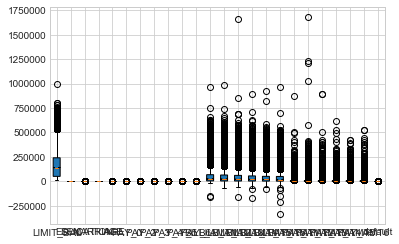

In [197]:
plot = []
continous_names = train_df.columns
for i in continous_names:
    #plt.boxplot(train_df.iloc[:,i])
    plot.append(list(train_df.loc[:,i]))
#plot = [list(train_df.loc[:,'Item_Weight']), list(train_df.loc[:,'Item_MRP'])]
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=continous_names)
plt.show()

mean : 4790.9881990157855  mode:  0.0 median:  2000.0
AxesSubplot(0.125,0.125;0.775x0.755)


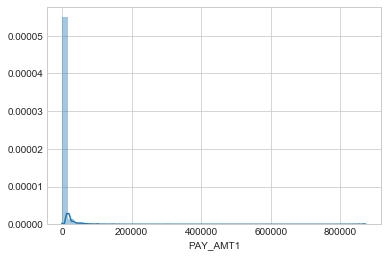

In [222]:
#Let plot PAY_AMT1 (most no of outliers) before outliers fixed
#for normal dist, mean,median,mode are approx same
print('mean :',train_df['PAY_AMT1'].mean(),' mode: ',train_df['PAY_AMT1'].mode()[0],'median: ',train_df['PAY_AMT1'].median())
print(sb.distplot(train_df['PAY_AMT1']))
#Looks left skewed

In [224]:
outliers
# a lot of outliers, lets use mean

['per outliers for LIMIT_BAL is 12.787159927686407',
 'per outliers for SEX is 0.0',
 'per outliers for EDUCATION is 17.71021649984567',
 'per outliers for MARRIAGE is 1.0317915251995238',
 'per outliers for AGE is 11.146875964548702',
 'per outliers for PAY_0 is 16.817319987653775',
 'per outliers for PAY_2 is 20.23898760968297',
 'per outliers for PAY_3 is 21.81533577318224',
 'per outliers for PAY_4 is 20.309537457559856',
 'per outliers for PAY_5 is 17.72564927906874',
 'per outliers for PAY_6 is 17.588958948807267',
 'per outliers for BILL_AMT1 is 16.73354204329997',
 'per outliers for BILL_AMT2 is 16.645354733453857',
 'per outliers for BILL_AMT3 is 16.740156091538427',
 'per outliers for BILL_AMT4 is 17.45006393579964',
 'per outliers for BILL_AMT5 is 17.674941575907226',
 'per outliers for BILL_AMT6 is 17.48313417699193',
 'per outliers for PAY_AMT1 is 16.46016138277702',
 'per outliers for PAY_AMT2 is 16.230874377177123',
 'per outliers for PAY_AMT3 is 16.160324529300233',
 'p

In [221]:
#train_df = full_data[0] backup if needed

In [223]:
#train_df=full_data[0]
#test_df = full_data[1]

#Gather outlier information
continous_names = [ x for x in train_df.columns if x not in ['default']]
outliers =[]
for i in continous_names:
    q75,q25 = np.percentile(train_df.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr* 1.5)#lower fence
    max = q25 + (iqr* 1.5)#upper fence
   
    
    print('-----Thes will be droppped for col :',i,'\n',train_df[train_df.loc[:,i] >max].head(2))
    print(min,max)
    outliers.append('per outliers for %s is %s'%(i, ( (len(train_df[train_df.loc[:,i] > max])/len(train_df)) )*100 ))
    train_df.loc[train_df.loc[:,i]<min,i] = train_df.loc[:,i].mean()
    train_df.loc[train_df.loc[:,i]<max,i] = train_df.loc[:,i].mean()
    #train_df = train_df.drop(train_df[train_df.loc[:,i] > max].index) #for dropping
    #if(i!= 'Item_Outlet_Sales'):#absent in test_df
    #    test_df = test_df.drop(test_df[test_df.loc[:,i] <min].index)
    #   test_df = test_df.drop(test_df[test_df.loc[:,i] > max].index)

-----Thes will be droppped for col : LIMIT_BAL 
     LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
6    500000.0  1.0        1.0       2.0  29.0    0.0    0.0    0.0    0.0   
12   630000.0  2.0        2.0       2.0  41.0   -1.0    0.0   -1.0   -1.0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
6     0.0  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   
12   -1.0  ...     6500.0     6500.0     2870.0    1000.0    6500.0    6500.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
6    20239.0   13750.0   13770.0        0  
12    6500.0    2870.0       0.0        0  

[2 rows x 24 columns]
-205000.0 305000.0
-----Thes will be droppped for col : SEX 
 Empty DataFrame
Columns: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default]
Index: []

[0

-----Thes will be droppped for col : BILL_AMT3 
     LIMIT_BAL      SEX  EDUCATION  MARRIAGE        AGE    PAY_0     PAY_2  \
6    500000.0  1.59083   1.872752  1.543259  35.565727  0.39996  0.100628   
17   320000.0  1.59083   1.872752  1.543259  49.000000  0.39996  0.100628   

       PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
6   0.040496 -0.028054 -0.086668  ...   542653.0   483003.0   473944.0   
17  0.040496 -0.028054 -0.086668  ...    70074.0     5856.0   195599.0   

    PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
6    55000.0   40000.0   38000.0   20239.0   13750.0   13770.0        0  
17   10358.0   10000.0   75940.0   20000.0  195599.0   50000.0        0  

[2 rows x 24 columns]
-81617.12824863364 87392.82564972673
-----Thes will be droppped for col : BILL_AMT4 
         LIMIT_BAL      SEX  EDUCATION  MARRIAGE        AGE    PAY_0     PAY_2  \
6   500000.000000  1.59083   1.872752  1.543259  35.565727  0.39996  0.100628   
32 

mean : 7205.120864601523  mode:  4790.9881990157855 median:  4790.9881990157855
AxesSubplot(0.125,0.125;0.775x0.755)


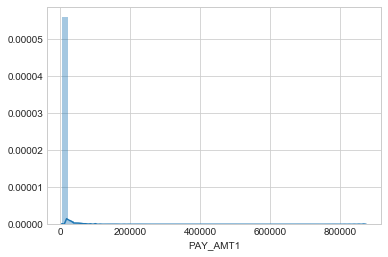

In [225]:
#Let plot PAY_AMT1 (most no of outliers) after fixing outliers
#for normal dist, mean,median,mode are approx same
print('mean :',train_df['PAY_AMT1'].mean(),' mode: ',train_df['PAY_AMT1'].mode()[0],'median: ',train_df['PAY_AMT1'].median())
print(sb.distplot(train_df['PAY_AMT1']))
#Looks left skewed

In [ ]:
#Functions block
def get_fn_ratio(dv):
    return len(dv[dv == 0]),len(dv[dv == 1])

In [199]:
train_df.shape

(30000, 24)

## SMOTE analysis

In [226]:
smt = SMOTETomek(random_state=42)
#Take backup
#bk_train_df = train_df
#bk_train_top10 = train_top10
full_data = [train_df]
train_df = full_data[0]

#Lets do oversampling for any data set present in full_data
for i,data in enumerate(full_data):
    iv = data.drop(['default'],axis=1)
    dv = data['default']
    txt ='training data' if i==0 else 'training with top10 attributes'
    print('orig ', txt, '(iv)(dv):',iv.shape,dv.shape,'(normal,frauds) :',get_fn_ratio(dv))                   
    iv_res , dv_res = smt.fit_sample(iv,dv)
    print('-----------------------------------------------------')
    print('oversampling ','(iv)(dv): ', txt,iv_res.shape,dv_res.shape,'(normal,frauds) :',get_fn_ratio(dv_res))                   
    iv_oversamp = pd.DataFrame(data=iv_res,columns=iv.columns.values)
    dv_oversamp = pd.DataFrame(data=dv_res,columns=dv.to_frame().columns.values)
    if(i==0):
        train_df = pd.concat([iv_oversamp,dv_oversamp],axis=1)
    else:
        train_top10 = pd.concat([iv_oversamp,dv_oversamp],axis=1)
        
print('Total samples: ',train_df.shape)#,train_top10.shape)
#we see now our target vra i.e default is balanced ..Yeah :)

orig  training data (iv)(dv): (45358, 23) (45358,) (normal,frauds) : (22679, 22679)
-----------------------------------------------------
oversampling  (iv)(dv):  training data (43030, 23) (43030,) (normal,frauds) : (21515, 21515)
Total samples:  (43030, 24)


In [227]:
bk = train_df
len(train_df[train_df['default']==0]),len(train_df[train_df['default']==1])

(21515, 21515)

In [228]:
#full_data = [train_df]
train_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,43030.000000,4.303000e+04,43030.000000,43030.000000,43030.000000,43030.000000,43030.000000,43030.000000,43030.000000,43030.000000,...,43030.000000,43030.000000,43030.000000,43030.000000,4.303000e+04,43030.000000,43030.000000,43030.000000,43030.000000,43030.000000
mean,185314.706251,1.590830e+00,2.079754,1.557339,37.435443,0.702291,0.518169,0.472514,0.377440,0.281677,...,63480.383004,59719.189130,57962.801049,7242.438280,7.508928e+03,6940.489988,6461.848421,6423.137363,6953.673277,0.500000
std,88557.563759,2.522456e-13,0.492695,0.139154,5.520236,0.721285,0.860197,0.873771,0.905484,0.890224,...,55226.852312,52454.161050,51218.107648,13760.538936,1.913797e+04,15137.248266,13319.451886,13361.312550,14970.920466,0.500006
min,152583.405423,1.590830e+00,1.872752,1.543259,35.565727,0.399960,0.100628,0.040496,-0.028054,-0.086668,...,43207.942887,40381.237625,39123.112913,4790.988199,4.894467e+03,4491.833827,4146.918643,4138.864520,4420.544250,0.000000
25%,152583.405423,1.590830e+00,1.872752,1.543259,35.565727,0.399960,0.100628,0.040496,-0.028054,-0.086668,...,43207.942887,40381.237625,39123.112913,4790.988199,4.894467e+03,4491.833827,4146.918643,4138.864520,4420.544250,0.000000
50%,152583.405423,1.590830e+00,1.872752,1.543259,35.565727,0.399960,0.100628,0.040496,-0.028054,-0.086668,...,43207.942887,40381.237625,39123.112913,4790.988199,4.894467e+03,4491.833827,4146.918643,4138.864520,4420.544250,0.500000
75%,152583.405423,1.590830e+00,1.872752,1.543259,35.565727,0.399960,0.100628,0.040496,-0.028054,-0.086668,...,43207.942887,40381.237625,39123.112913,4790.988199,4.894467e+03,4491.833827,4146.918643,4138.864520,4420.544250,1.000000
max,1000000.000000,1.590830e+00,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


## lets see continous variables distribution

In [229]:
len(train_df[train_df['default']==0]),len(train_df[train_df['default']==1])


(21515, 21515)

mean : 185314.7062514904  mode:  152583.4054225899 median:  152583.4054225899
AxesSubplot(0.125,0.125;0.775x0.755)


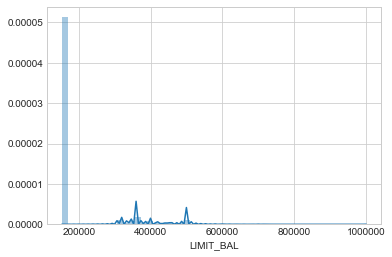

In [230]:
print('mean :',train_df['LIMIT_BAL'].mean(),' mode: ',train_df['LIMIT_BAL'].mode()[0],'median: ',train_df['LIMIT_BAL'].median())
print(sb.distplot(train_df['LIMIT_BAL']))

mean : 37.43544285862867  mode:  35.56572710894424 median:  35.56572710894424
AxesSubplot(0.125,0.125;0.775x0.755)


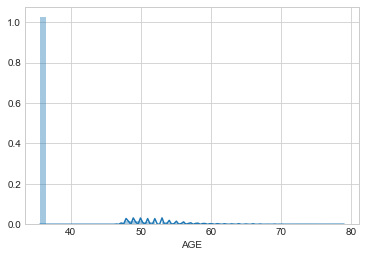

In [231]:
#for normal dist, mean,median,mode are approx same
print('mean :',train_df['AGE'].mean(),' mode: ',train_df['AGE'].mode()[0],'median: ',train_df['AGE'].median())
print(sb.distplot(train_df['AGE']))
#Looks left skewed

mean : 50606.63560791867  mode:  0.0 median:  22008.31330844698
AxesSubplot(0.125,0.125;0.775x0.755)


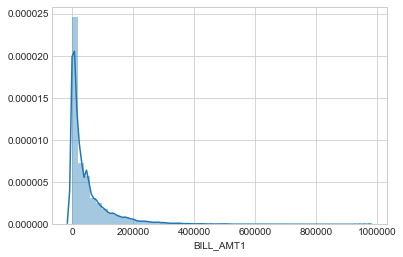

In [121]:
#for normal dist, mean,median,mode are approx same
train_df = bk
print('mean :',train_df['BILL_AMT1'].mean(),' mode: ',train_df['BILL_AMT1'].mode()[0],'median: ',train_df['BILL_AMT1'].median())
print(sb.distplot(train_df['BILL_AMT1']))
#Looks left skewed

mean : 73419.3447174026  mode:  50587.66726739388 median:  50587.66726739388
AxesSubplot(0.125,0.125;0.775x0.755)


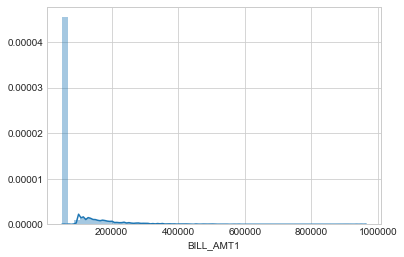

In [232]:
#for normal dist, mean,median,mode are approx same
#train_df = bk
print('mean :',train_df['BILL_AMT1'].mean(),' mode: ',train_df['BILL_AMT1'].mode()[0],'median: ',train_df['BILL_AMT1'].median())
print(sb.distplot(train_df['BILL_AMT1']))
#Looks left skewed

## correlation analysis

AxesSubplot(0.125,0.1925;0.62x0.62)


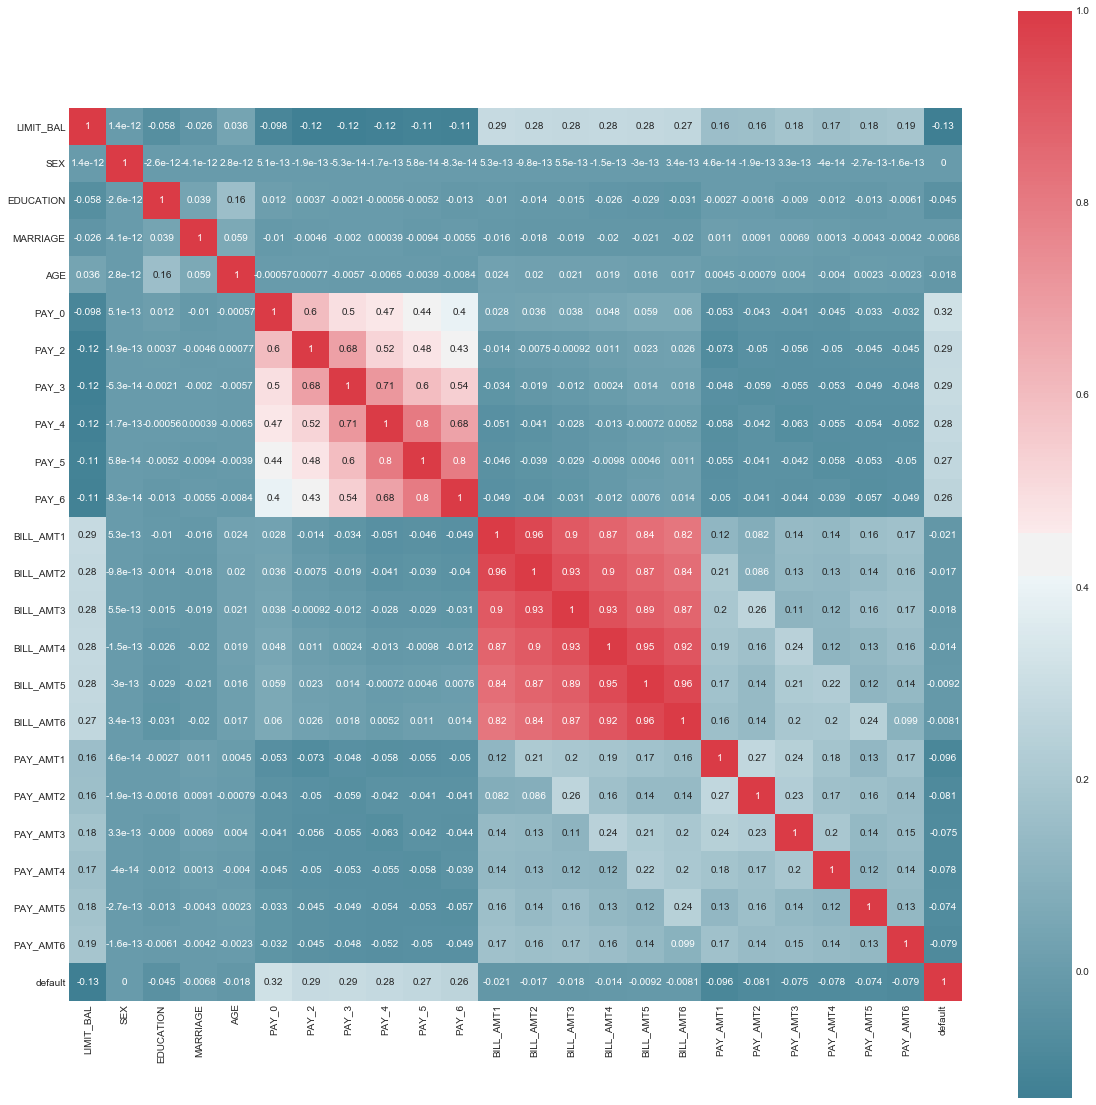

In [233]:
#corr analysis
f,ax=plt.subplots(figsize=(20,20))
corr = train_df.corr()
print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
            square =True,ax=ax,annot = True))

## INSIGHT
PAY* are highly corr with each other, so is BILL_AMT*
while PAY_AMT* are unrelated

In [234]:
#let us see PAY* variables and their corelation
abs(corr['PAY_0']).nlargest(10)
#pay_0 is correlated with PAY_2 till PAY_5(>0.5), so basically all of them carry same info
# we should drop all but one PAY? which has highest corr with default

PAY_0        1.000000
PAY_2        0.598272
PAY_3        0.495547
PAY_4        0.468134
PAY_5        0.435412
PAY_6        0.397948
default      0.317150
LIMIT_BAL    0.097967
BILL_AMT6    0.059976
BILL_AMT5    0.059331
Name: PAY_0, dtype: float64

In [235]:
abs(corr['default']).sort_values(ascending=False)
#Our corr of DV with IV have decreased as compared to orig dataset, for sake of this oversampling let us take top 10 IV 
#which contribute most to our DV (in next step)

default      1.000000
PAY_0        0.317150
PAY_3        0.289902
PAY_2        0.287666
PAY_4        0.280528
PAY_5        0.270757
PAY_6        0.257454
LIMIT_BAL    0.131822
PAY_AMT1     0.095615
PAY_AMT2     0.080969
PAY_AMT6     0.079421
PAY_AMT4     0.077806
PAY_AMT3     0.075482
PAY_AMT5     0.074081
EDUCATION    0.045046
BILL_AMT1    0.020774
AGE          0.018257
BILL_AMT3    0.017572
BILL_AMT2    0.017104
BILL_AMT4    0.014354
BILL_AMT5    0.009173
BILL_AMT6    0.008113
MARRIAGE     0.006831
SEX          0.000000
Name: default, dtype: float64

In [236]:
#since PAY_0 is highly correlated with default(TV/DV), let keep it and check its corr with other PAY_?
corr['PAY_0'].nlargest(10)
#PAY_0 is correlated with other PAY_2,3,4,5,6, drop those

PAY_0        1.000000
PAY_2        0.598272
PAY_3        0.495547
PAY_4        0.468134
PAY_5        0.435412
PAY_6        0.397948
default      0.317150
BILL_AMT6    0.059976
BILL_AMT5    0.059331
BILL_AMT4    0.047746
Name: PAY_0, dtype: float64

In [237]:
#Looks like BILL_AMT* have similar data, lets check corr matrix
corr['BILL_AMT1'].nlargest(10)
#BILL_AMT1 is stringly correlated with others, lets keep BILL_AMT1 as it has highest corr coef with our DV(Default)

BILL_AMT1    1.000000
BILL_AMT2    0.960160
BILL_AMT3    0.902961
BILL_AMT4    0.870939
BILL_AMT5    0.839242
BILL_AMT6    0.815987
LIMIT_BAL    0.287487
PAY_AMT6     0.171272
PAY_AMT5     0.161141
PAY_AMT3     0.139129
Name: BILL_AMT1, dtype: float64

In [239]:
abs(corr['default']).sort_values(ascending=False)

default      1.000000
PAY_0        0.317150
PAY_3        0.289902
PAY_2        0.287666
PAY_4        0.280528
PAY_5        0.270757
PAY_6        0.257454
LIMIT_BAL    0.131822
PAY_AMT1     0.095615
PAY_AMT2     0.080969
PAY_AMT6     0.079421
PAY_AMT4     0.077806
PAY_AMT3     0.075482
PAY_AMT5     0.074081
EDUCATION    0.045046
BILL_AMT1    0.020774
AGE          0.018257
BILL_AMT3    0.017572
BILL_AMT2    0.017104
BILL_AMT4    0.014354
BILL_AMT5    0.009173
BILL_AMT6    0.008113
MARRIAGE     0.006831
SEX          0.000000
Name: default, dtype: float64

## NOTE - 
extract top 10 features with highest corr coef wrt to DV/TV and remove those hich are correlated with each other
#for e.g PAY_4 is included in train_top10 along with PAY_2,3,6 but if you look at corr of PAY_4 wrt these var, it is >0.5
#so its duplicacy and can be dropped

In [241]:
#skip_list= ['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4','PAY_2','PAY_3','PAY_4','PAY_5']
#inc_list = ['default','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT4']
#inc_list = ['default','PAY_0','PAY_4','PAY_5','PAY_6','LIMIT_BAL','PAY_AMT1','PAY_AMT2','PAY_AMT4','PAY_AMT6',\'PAY_AMT3','PAY_AMT5']
#tmp = train_df.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4','PAY_2','PAY_3','PAY_4','PAY_5'],axis=1)
#tmp = train_df[inc_list]
#corr_tmp =  train_df[inc_list].corr() #if we want manual update
corr_tmp = corr #Automatically take top 10 IV with greater correlation 
new_corr = abs(corr_tmp['default']).nlargest(11).values
#print(abs(corr_tmp['default']).sort_values(ascending=False).nlargest(11))
#print(new_corr_tmp)
larg_10 = abs(corr_tmp['default']).nlargest(11)

#Uncomment and see what all it has 
#larg_10.index.values, larg_10.values,larg_10
train_top10 = train_df[larg_10.index.values]
train_top10.head(2)
## FYI
#Now we have 2 models train_df(orig) and train_top10, we shall run analysis on both and cmp results

,default,PAY_0,PAY_3,PAY_2,PAY_4,PAY_5,PAY_6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT6
0,1,2.00000,0.040496,2.0,-0.028054,-0.086668,-0.122302,152583.405423,4790.988199,4894.466876,4420.54425
1,1,0.39996,0.040496,2.0,-0.028054,-0.086668,2.000000,152583.405423,4790.988199,4894.466876,4420.54425


In [242]:
#Write processed data to csv
#train_top10.to_csv(processed_data_path,index=False)
train_top10 = pd.read_csv(processed_data_path)
train_top10.head(1)

,default,PAY_0,PAY_3,PAY_2,PAY_4,PAY_5,PAY_6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT6
0,1,2.0,0.040496,2.0,-0.028054,-0.086668,-0.122302,152583.405423,4790.988199,4894.466876,4420.54425


In [243]:
len(train_top10[train_top10['default']==0]),len(train_top10[train_top10['default']==1])
len(train_df[train_df['default']==0]),len(train_df[train_df['default']==1])

(21515, 21515)

In [ ]:
#bk_top=train_top10
#bk_tr = train_df
#train_top10 = bk_top

In [285]:
train_top10['PAY_0'].count(),train_top10['default'].count(),train_df.default.count()
#train_top10

(45482, 45482, 45482)

## Model generation
using K folds

In [244]:
#class to extend sklearn classifier
class sklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def train(self, train_iv, train_dv):
        self.clf.fit(train_iv, train_dv)#train on training data
    def predict(self, test_iv):
        return self.clf.predict(test_iv)
    def score(self, iv_test, dv_test):
        return self.clf.score(iv_test, dv_test)
    def feature_importances(self,x, y):
        print(self.clf.fit(x,y).feature_importances_)
    def auc(self,iv_test):
        dv_test_pred_proba = model.predict_proba(pd.DataFrame(data=iv_test,columns=iv_train.columns))[::,1]
        fpr, tpr, _ = roc_curve(dv_test,  dv_test_pred_proba)
        auc = roc_auc_score(dv_test,  dv_test_pred_proba)
        return auc,fpr,tpr
    

SEED=0
NFOLDS =5
kf = KFold(n_splits = 5)
rf_params = {
    'n_estimators': 50
    
}
# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'rbf',
    'C' : 0.25,
    'gamma':0.01
    }

lr_params ={
    'C' :0.1
}

#call with object of respective class and initialize the parameters
rf = sklearnHelper(clf = RandomForestClassifier, seed = SEED,params = None)
svm = sklearnHelper(clf=SVC, seed=SEED, params = svc_params)
nb = sklearnHelper(clf=GaussianNB, seed=SEED, params=None)
lr = sklearnHelper(clf = LogisticRegression, seed = SEED,params = lr_params)


In [239]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [262]:
def get_oof(data,clf, iv, dv):
    i = 0
    sum_score = 0
    it_score = 0
    sum_auc = 0
    for train_index,test_index in kf.split(range(data.shape[0])):
        iv_train, iv_test, dv_train,dv_test = iv[train_index], iv[test_index]\
                                ,dv[train_index], dv[test_index]
        #print('len ',len(iv_train),len(iv_test),len(dv_train),len(dv_test))   
        clf.train(iv_train, dv_train)
        dv_test_pred = clf.predict(iv_test)
        it_score = clf.score(iv_test, dv_test)
        sum_score += it_score
        print(it_score)
        
        """To be updated later
        auc = clf.auc(iv_test)[0]
        fpr = clf.auc(iv_test)[1]
        tpr = clf.auc(iv_test)[2]
        sum_auc += auc
        print('auc :',auc)
        #auc_for_model.append([auc])
    """
        

    return (sum_score/NFOLDS, sum_auc/NFOLDS,[],[])

def get_max(result):
    #print(result)
    max = 0
    for item in result.values():
        item_ = item[0]
        if max < item_:
            max = item_
    return max

   


In [263]:
iv = train_top10.drop(['default'], axis =1).values
dv = train_top10['default'].values



print('RandomForestClasssifier-------')
rf_avg_score,rf_auc,fpr,tpr = get_oof(train_top10, rf, iv, dv)
print('Average RandomForestClasssifier score', rf_avg_score)

print('SVM-----------------')
svm_avg_score , svm_auc,fpr,tpr = -1,[],0,0#get_oof(train_top10,svm, iv, dv)
#SVM almost does while calculating the distances.
#Time comlexity becomes no_samples^2 * no_features for eac feature it needs to calculates svm,so skipping SVm
print('Average SVM score', svm_avg_score)

print('NAIVE BAYES-----------------')
nb_avg_score,nb_auc,fpr,tpr = get_oof(train_top10,nb, iv, dv)
print('Average nb score', nb_avg_score)

print('logisticRegression--------')
lr_avg_score, lr_auc,fpr,tpr= get_oof(train_top10,lr, iv, dv)
print('Average lr score', lr_avg_score)

print("Training complete")
result = {'RandomForestClasssifier':(rf_avg_score,rf_auc,fpr,tpr),
         'svm':(svm_avg_score,svm_auc,fpr,tpr),
         'naive bayes': (nb_avg_score,nb_auc,fpr,tpr),
         'LogisticRegression':(lr_avg_score,lr_auc,fpr,tpr)}
upd_result = dict((val[0],key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForestClasssifier-------
0.7710899372530793
0.7736462932837556
0.7914245874970951
0.6271206135254473
0.5600743667208924
Average RandomForestClasssifier score 0.704671159656054
SVM-----------------
Average SVM score -1
NAIVE BAYES-----------------
0.7552870090634441
0.7574947710899372
0.78863583546363
0.5758772949105275
0.5178944922147339
Average nb score 0.6790378805484545
logisticRegression--------
0.754008831048106
0.7574947710899372
0.787706251452475
0.49349291192191497
0.3659075063908901
Average lr score 0.6317220543806646
Training complete
%%%%%%%%%% BEST model : RandomForestClasssifier -----score 0.704671159656054


## Analysis
classification metrics is not a good indication for imbalanced datasets
Rather we use ROC 
## Findings of roc_curve
Recall is also called sensitivity(TP rate)
Specificity is also called TN rate
F1 score = combination of recall and specificity
Depending on the kind of problem you want to solve you may want to maximize either sensitivity or specificity.
confusion matrix considers only a single threshild value to generate a curve vs all possibe classification thresholds are considered for ROC curve

ROC compares TPR(y-axis) vs FPR(x-axis) 
More the area under the curve, better the model 
E.g. Paper published in a Journal
positives(admitted) = 250
negatives(not admitted) =250

Based on prob threshold(>0.6 genrally) which we set, we classify into classes
If you model did not do well, then distribution plot for both classes will be overalapping for a significant area and 
the roc curve will be a 45 degree line, telling that model just did guessing

TPR = TP / all positives
FPR = FP/ all negatives

Curve generation
E.g. If threshold is say 0.8,then the area to the right of the curve is admitted and to the left is not admitted
TPR = 50(red pixels to the right of threshold line)/250(total red(pos) pixels)
FPR = 0(blue pixels to the right of threshold line)/250(total red(pos) pixels)
plot (FPR,TPR) --> (0,0.2)
E.g. If threshold is say 0.5, then the area to the right of the curve is admitted and to the left is not admitted
TPR = 230(red pixels to the right of threshold line)/250(total red(pos) pixels)=0.94
FPR = 125(blue pixels to the right of threshold line)/250(total red(pos) pixels)=0.5
plot (FPR,TPR) --> (0.5,0.94)
All the possible classificaton thresholds are considered and points are plotted to fit a curve

So for good model, curve will be hugging the topmost left corner, more area under the curve
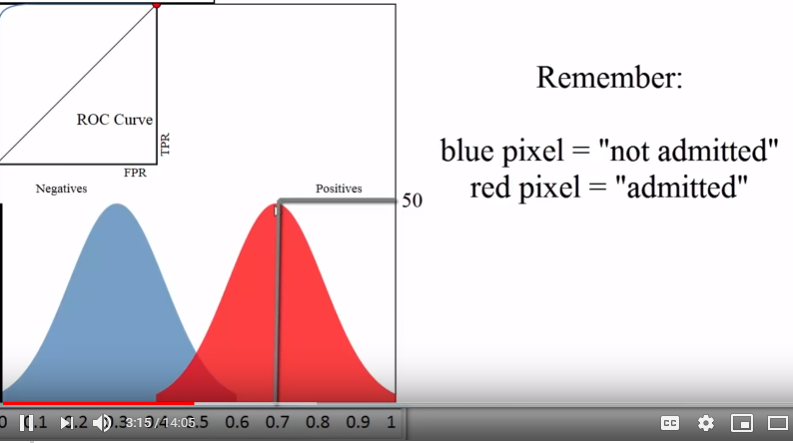


In [247]:
iv_test.head(2),dv_test[2],dv_test_pred[2]
np.any(dv_test_pred==0)
len(train_top10[train_top10.default==0]),len(train_top10[train_top10.default==1])
len(dv_test)

8968

In [248]:
iv = train_top10.drop(['default'],axis=1)
dv = train_top10['default'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2)

In [249]:

#normalizing for rest except TV/DV
#continous_names.remove('default')
 
for i in train_top10.columns:
    train_top10[i] = (train_top10[i] - train_top10[i].min())/(train_top10[i].max() - train_top10[i].min())
    #test_df[i] = (test_df[i] - test_df[i].min())/(test_df[i].max() - test_df[i].min())
train_top10.head()

,default,PAY_0,PAY_3,PAY_2,PAY_4,PAY_5,PAY_6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT6
0,1.0,0.21053,0.0,0.240446,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,1.0,0.00000,0.0,0.240446,0.0,0.0,0.261293,0.0,0.0,0.000000,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.018928,0.0


0.6593074599116895
col_0     0     1
row_0            
0      3700   626
1      2306  1974
col_0     0     1
row_0            
0      3700   626
1      2306  1974
accuracies: 
Accuracy in Identifying non-defaulters : 75.92307692307692
Wrongly telling a person will default 24.076923076923077
**Accuracy in Identifying defaulters 61.60506160506161
**Wrongly telling a person will not default, whereas he is going to be 38.39493839493839
0.7370043283169361


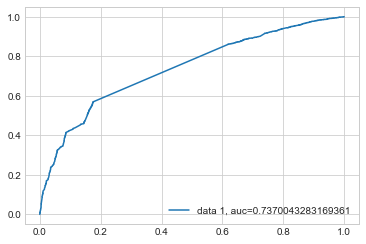

In [250]:


model = LogisticRegression(C=0.1)
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)



0.5539158726469905
col_0    0     1
row_0           
0      743  3583
1      256  4024
col_0    0     1
row_0           
0      743  3583
1      256  4024
accuracies: 
Accuracy in Identifying non-defaulters : 52.89864598396215
Wrongly telling a person will default 47.10135401603786
**Accuracy in Identifying defaulters 74.37437437437437
**Wrongly telling a person will not default, whereas he is going to be 25.625625625625624
0.7213803139893105


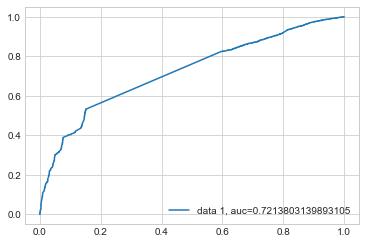

In [264]:


model = GaussianNB()
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)



0.7234487566813851
col_0     0     1
row_0            
0      3779   547
1      1833  2447
col_0     0     1
row_0            
0      3779   547
1      1833  2447
accuracies: 
Accuracy in Identifying non-defaulters : 81.73012692050769
Wrongly telling a person will default 18.269873079492317
**Accuracy in Identifying defaulters 67.33784746970777
**Wrongly telling a person will not default, whereas he is going to be 32.66215253029223
0.7892373218228405


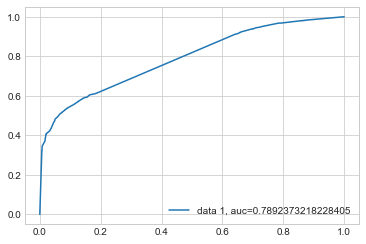

In [251]:

model = RandomForestClassifier()
model.fit(iv_train,dv_train)
dv_test_pred = model.predict(iv_test)
print(model.score(iv_test,dv_test))#accuracy
cm_analysis(iv_test, dv_test,dv_test_pred)



## Randomforest fits better since auc value is greater

In [252]:
def plot_roc(iv_test,dv_test):
    dv_test_pred_proba = model.predict_proba(iv_test)[::,1]
    fpr, tpr, _ = roc_curve(dv_test,  dv_test_pred_proba)
    auc = roc_auc_score(dv_test,  dv_test_pred_proba)
    print(auc)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()


def cm_analysis(iv_test, dv_test,dv_test_pred):
    #confusion matrix
    #here negative cases(one with malignant cancer) are imp to be diagonsed
    cm = pd.crosstab(dv_test,dv_test_pred)
    #cm = cm.rename(columns={'beningn':1,'malignant':0},index={'beningn':1,'malignant':0})
    print(cm)
    try:
        acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])#the no of tp+tn/all
        specifity = (cm[1][1]/(cm[1][1]+cm[1][0]))*100#no of negatives correctly classified (no of non-defaulter)
        fnr  = (cm[0][1]/(cm[0][1]+cm[0][0]))*100#no of -ve wrongly classified, predicted as +...wrong info saying he will default *****

        recall = (cm[0][0]/(cm[0][1]+cm[0][0]))*100#no of actual +ve classes correctly classified(no of defaulters on loan)****************
        fpr = (cm[1][0]/ (cm[1][0]+cm[1][1]))*100#no of wrong positives , predicted as + but actually negative...Wrongly telling \
                                            #a customer will not default,whereas he is going to be
    except:
        acc = (cm[0][0])/(cm[0][0]+cm[1][0])#the no of tp+tn/all
        specifity = 0#no of negatives correctly classified (no of non-defaulter)
        fnr  = 0 #no of -ve wrongly classified, predicted as +...wrong info saying he will default *****

        recall = (cm[0][0]/(cm[0][0]))*100#no of actual +ve classes correctly classified(no of defaulters on loan)****************
        fpr = 0#no of wrong positives , predicted as + but actually negative...Wrongly telling \
                                            #a customer will not default,whereas he is going to be
    #0-nd,1-d
    print(cm)
    print('accuracies: ')
    print('Accuracy in Identifying non-defaulters :',specifity )
    print('Wrongly telling a person will default',fpr )
    print('**Accuracy in Identifying defaulters',recall )
    print('**Wrongly telling a person will not default, whereas he is going to be',fnr )

    plot_roc(iv_test,dv_test)

